In [1]:
import pandas as pd
import numpy as np
import os
import time
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

#Change directory
os.chdir(r"C:\Users\Matome.Molokome\Desktop\Unisa\2021\HRCOS82 Research\favorita-grocery-sales-forecasting")

#Load Data
start_time = time.time()
chunk = pd.read_csv('train.csv',dtype={"id": object, "date": object,"store_nbr": object,"item_nbr": object,
                                         "unit_sales": float, "onpromotion": object
                                        },chunksize=1000000)


df = pd.concat(chunk)

end_time = time.time()

print ("Completed in",(end_time-start_time))


#df.sample(10)

Completed in 289.8862535953522


In [2]:
df.sample(10)
df.dtypes

id              object
date            object
store_nbr       object
item_nbr        object
unit_sales     float64
onpromotion     object
dtype: object

In [3]:
stores = pd.read_csv('stores.csv',dtype={"store_nbr": object})

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
stores ['type_numeric'] = labelencoder.fit_transform(stores ['type'])
stores ['city_numeric'] = labelencoder.fit_transform(stores ['city'])
stores ['state_numeric'] = labelencoder.fit_transform(stores ['state'])
stores

,store_nbr,city,state,type,cluster,type_numeric,city_numeric,state_numeric
0,1,Quito,Pichincha,D,13,3,18,12
1,2,Quito,Pichincha,D,13,3,18,12
2,3,Quito,Pichincha,D,8,3,18,12
3,4,Quito,Pichincha,D,9,3,18,12
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4,3,21,14
5,6,Quito,Pichincha,D,13,3,18,12
6,7,Quito,Pichincha,D,8,3,18,12
7,8,Quito,Pichincha,D,8,3,18,12
8,9,Quito,Pichincha,B,6,1,18,12
9,10,Quito,Pichincha,C,15,2,18,12


In [4]:
oil = pd.read_csv('oil.csv')
print(oil)
oil.dtypes


            date  dcoilwtico
0     2013-01-01         NaN
1     2013-01-02       93.14
2     2013-01-03       92.97
3     2013-01-04       93.12
4     2013-01-07       93.20
5     2013-01-08       93.21
6     2013-01-09       93.08
7     2013-01-10       93.81
8     2013-01-11       93.60
9     2013-01-14       94.27
10    2013-01-15       93.26
11    2013-01-16       94.28
12    2013-01-17       95.49
13    2013-01-18       95.61
14    2013-01-21         NaN
15    2013-01-22       96.09
16    2013-01-23       95.06
17    2013-01-24       95.35
18    2013-01-25       95.15
19    2013-01-28       95.95
20    2013-01-29       97.62
21    2013-01-30       97.98
22    2013-01-31       97.65
23    2013-02-01       97.46
24    2013-02-04       96.21
25    2013-02-05       96.68
26    2013-02-06       96.44
27    2013-02-07       95.84
28    2013-02-08       95.71
29    2013-02-11       97.01
...          ...         ...
1188  2017-07-21       45.78
1189  2017-07-24       46.21
1190  2017-07-

date           object
dcoilwtico    float64
dtype: object

In [5]:
items = pd.read_csv('items.csv',dtype={"item_nbr": object})
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
items ['family_numeric'] = labelencoder.fit_transform(items ['family'])
print(items)
items.dtypes


     item_nbr            family  class  perishable  family_numeric
0       96995         GROCERY I   1093           0              12
1       99197         GROCERY I   1067           0              12
2      103501          CLEANING   3008           0               7
3      103520         GROCERY I   1028           0              12
4      103665      BREAD/BAKERY   2712           1               5
5      105574         GROCERY I   1045           0              12
6      105575         GROCERY I   1045           0              12
7      105576         GROCERY I   1045           0              12
8      105577         GROCERY I   1045           0              12
9      105693         GROCERY I   1034           0              12
10     105737         GROCERY I   1044           0              12
11     105857         GROCERY I   1092           0              12
12     106716         GROCERY I   1032           0              12
13     108079         GROCERY I   1030           0            

item_nbr          object
family            object
class              int64
perishable         int64
family_numeric     int32
dtype: object

In [6]:
transactions = pd.read_csv('transactions.csv', dtype={"store_nbr": object})
print(transactions)
transactions.dtypes

             date store_nbr  transactions
0      2013-01-01        25           770
1      2013-01-02         1          2111
2      2013-01-02         2          2358
3      2013-01-02         3          3487
4      2013-01-02         4          1922
5      2013-01-02         5          1903
6      2013-01-02         6          2143
7      2013-01-02         7          1874
8      2013-01-02         8          3250
9      2013-01-02         9          2940
10     2013-01-02        10          1293
11     2013-01-02        11          3547
12     2013-01-02        12          1362
13     2013-01-02        13          1102
14     2013-01-02        14          2002
15     2013-01-02        15          1622
16     2013-01-02        16          1167
17     2013-01-02        17          1580
18     2013-01-02        18          1635
19     2013-01-02        19          1369
20     2013-01-02        23          1381
21     2013-01-02        24          2605
22     2013-01-02        25       

date            object
store_nbr       object
transactions     int64
dtype: object

In [7]:
holidays_events = pd.read_csv('holidays_events.csv')
holidays_events ['Holiday'] = '1'
print(holidays_events)
holidays_events.dtypes

           date        type    locale                     locale_name  \
0    2012-03-02     Holiday     Local                           Manta   
1    2012-04-01     Holiday  Regional                        Cotopaxi   
2    2012-04-12     Holiday     Local                          Cuenca   
3    2012-04-14     Holiday     Local                        Libertad   
4    2012-04-21     Holiday     Local                        Riobamba   
5    2012-05-12     Holiday     Local                            Puyo   
6    2012-06-23     Holiday     Local                        Guaranda   
7    2012-06-25     Holiday  Regional                        Imbabura   
8    2012-06-25     Holiday     Local                       Latacunga   
9    2012-06-25     Holiday     Local                         Machala   
10   2012-07-03     Holiday     Local                   Santo Domingo   
11   2012-07-03     Holiday     Local                       El Carmen   
12   2012-07-23     Holiday     Local              

date           object
type           object
locale         object
locale_name    object
description    object
transferred      bool
Holiday        object
dtype: object

In [8]:
#Filter Dataset
traindata = df[df.date >= '2017-08-01']
traindata.isnull().sum()

id             0
date           0
store_nbr      0
item_nbr       0
unit_sales     0
onpromotion    0
dtype: int64

In [9]:
#Encoding

#Dictionary
encoding_nums = {"onpromotion":     {"True": 1, "False": 0}}

#FindandReplace
traindata = traindata.replace(encoding_nums)

In [10]:
traindata.sample(10)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion
124774904,124774904,2017-08-08,54,279125,3.0,0
125213155,125213155,2017-08-13,15,1153584,3.0,0
124706130,124706130,2017-08-08,17,2026256,1.0,0
125441771,125441771,2017-08-15,27,557286,11.0,1
124043955,124043955,2017-08-02,4,1400328,4.0,0
124038738,124038738,2017-08-02,2,1213906,1.0,0
125179498,125179498,2017-08-12,52,115892,13.0,0
125231167,125231167,2017-08-13,25,1305845,1.0,0
124630193,124630193,2017-08-07,33,2105347,1.0,0
125216385,125216385,2017-08-13,17,1354713,17.0,0


In [11]:
#Join Dimensions
traindata = pd.merge(traindata, items, on='item_nbr', how='left')
traindata = pd.merge(traindata, stores , on='store_nbr', how='left')
traindata = pd.merge(traindata, holidays_events , on='date', how='left')
traindata = pd.merge(traindata, oil , on='date', how='left')
traindata = pd.merge(traindata, transactions , on= ['date','store_nbr'], how='left')


traindata.sample(10)

,id,date,store_nbr,item_nbr,unit_sales,onpromotion,family,class,perishable,family_numeric,...,city_numeric,state_numeric,type_y,locale,locale_name,description,transferred,Holiday,dcoilwtico,transactions
1335551,125261623,2017-08-13,42,1958187,1.0,0,BEVERAGES,1142,0,3,...,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,932
291764,124217836,2017-08-03,43,843585,4.0,0,GROCERY I,1016,0,12,...,6,5,NaN,NaN,NaN,NaN,NaN,NaN,49.03,1389
1117651,125043723,2017-08-11,39,471980,3.0,0,GROCERY I,1058,0,12,...,3,0,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,1,48.81,1170
258597,124184669,2017-08-03,23,1464043,4.0,0,BEVERAGES,1144,0,3,...,0,15,NaN,NaN,NaN,NaN,NaN,NaN,49.03,964
171178,124097250,2017-08-02,34,828630,32.0,0,DELI,2636,1,9,...,8,6,NaN,NaN,NaN,NaN,NaN,NaN,49.60,2034
158567,124084639,2017-08-02,26,1457176,3.0,0,HOME CARE,3106,0,18,...,8,6,NaN,NaN,NaN,NaN,NaN,NaN,49.60,648
1325316,125251388,2017-08-13,37,1457245,1.0,0,HOME CARE,3110,0,18,...,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,888
210034,124136106,2017-08-02,51,1421156,8.0,0,BEVERAGES,1136,0,3,...,8,6,NaN,NaN,NaN,NaN,NaN,NaN,49.60,1810
1096937,125023009,2017-08-11,27,115720,4.0,0,GROCERY I,1084,0,12,...,4,6,Transfer,National,Ecuador,Traslado Primer Grito de Independencia,False,1,48.81,1936
1304641,125230713,2017-08-13,25,823245,1.0,0,BREAD/BAKERY,2708,1,5,...,20,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1107


In [12]:
#drop columns
traindata.drop(['id', 'family','type_y','locale','locale_name','description','transferred','state','city','type_x'],
               axis=1,inplace=True)
traindata.sample(10)


,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions
1017948,2017-08-10,40,1346627,3.000,1,3008,0,7,3,2,13,4,1,48.54,1293
430314,2017-08-05,4,215356,2.000,0,1016,0,12,9,3,18,12,1,NaN,1515
1054092,2017-08-11,3,953404,14.000,1,3046,0,7,8,3,18,12,1,48.81,2991
1073799,2017-08-11,13,358096,1.000,0,1002,0,12,15,2,10,3,1,48.81,841
500714,2017-08-05,41,1148812,5.000,0,1120,0,3,4,3,13,4,1,NaN,1355
1504032,2017-08-15,20,864508,5.000,0,1048,0,12,6,1,18,12,1,47.57,1516
1250301,2017-08-12,50,1464038,6.000,1,1148,0,3,14,0,0,15,NaN,NaN,2987
176738,2017-08-02,37,1444598,8.000,0,1008,0,12,2,3,3,0,NaN,49.60,1690
189867,2017-08-02,44,314879,18.000,0,3034,0,7,5,0,18,12,NaN,49.60,4643
743668,2017-08-07,52,671699,2.437,0,2662,1,9,11,0,14,10,NaN,49.37,2152


In [13]:
#Cleaning data 

#replace NAN with zero
traindata['Holiday'] = traindata['Holiday'].fillna(0)




In [14]:
traindata.sample(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions
715895,2017-08-07,40,1402017,15.0,1,3034,0,7,3,2,13,4,0,49.37,1489
510341,2017-08-05,45,1239916,2.0,0,2172,1,8,11,0,18,12,1,NaN,4684
405869,2017-08-04,47,1147731,5.0,0,6806,0,0,14,0,18,12,0,49.57,4010
804593,2017-08-08,32,1464091,1.0,0,1148,0,3,3,2,8,6,0,49.07,574
44702,2017-08-01,23,2002465,2.0,0,3040,0,7,9,3,0,15,0,49.19,963
379200,2017-08-04,34,1239913,11.0,0,2172,1,8,6,1,8,6,0,49.57,2286
1408522,2017-08-14,24,820645,2.0,0,1004,0,12,1,3,8,6,0,47.59,2092
1502723,2017-08-15,19,1239913,15.0,0,2172,1,8,15,2,7,1,1,47.57,1158
557018,2017-08-06,11,1047753,23.0,0,1126,0,3,6,1,2,12,0,NaN,2430
1517927,2017-08-15,28,793346,12.0,0,4126,0,25,10,4,8,6,1,47.57,1343


In [15]:
#Cleaning data 
#replace NAN with mean
dcoilwtico_mean =traindata['dcoilwtico'].mean()
traindata['dcoilwtico'] = traindata['dcoilwtico'].fillna(dcoilwtico_mean)

In [16]:
#Check negative sales
traindata[traindata['unit_sales'] < 0]

,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions
5587,2017-08-01,3,1164923,-29.000,0,1132,0,3,8,3,18,12,0,49.190000,3066
5611,2017-08-01,3,1177984,-2.000,0,1002,0,12,8,3,18,12,0,49.190000,3066
21967,2017-08-01,10,1990061,-7.000,0,1144,0,3,15,2,18,12,0,49.190000,984
59830,2017-08-01,31,2011328,-36.000,0,1072,0,12,10,1,1,9,0,49.190000,1570
76543,2017-08-01,41,568133,-3.000,0,1122,0,3,4,3,13,4,0,49.190000,1178
76976,2017-08-01,41,1047681,-4.000,0,1120,0,3,4,3,13,4,0,49.190000,1178
97564,2017-08-01,49,1397067,-1.000,0,3032,0,7,11,0,18,12,0,49.190000,3034
98423,2017-08-01,49,2010315,-1.000,0,4126,0,25,11,0,18,12,0,49.190000,3034
114826,2017-08-02,3,940585,-25.000,0,3010,0,7,8,3,18,12,0,49.600000,3275
117855,2017-08-02,4,1360010,-2.000,0,6329,0,16,9,3,18,12,0,49.600000,1414


In [17]:
#cleaning Data
# Drop Negative sales
traindata.drop(traindata[traindata['unit_sales'] < 0].index, inplace = True)

In [18]:
#Check negative sales
traindata[traindata['unit_sales'] < 0]

,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions


In [19]:
traindata.sample(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions
1433205,2017-08-14,39,819195,12.0,1,1002,0,12,6,1,3,0,0,47.590000,1406
1022677,2017-08-10,43,513853,11.0,0,3034,0,7,10,4,6,5,1,48.540000,1455
1554081,2017-08-15,47,977007,10.0,0,3034,0,7,14,0,18,12,1,47.570000,3581
749539,2017-08-08,1,936994,2.0,1,1004,0,12,13,3,18,12,0,49.070000,1766
1180307,2017-08-12,14,329071,3.0,0,1032,0,12,7,2,19,2,0,48.908317,1359
1280034,2017-08-13,10,1464081,2.0,0,1190,0,3,15,2,18,12,0,48.908317,810
302063,2017-08-03,47,940664,12.0,0,1124,0,3,14,0,18,12,0,49.030000,3688
994397,2017-08-10,25,1102975,6.0,0,1122,0,3,1,3,20,13,1,48.540000,1044
1029368,2017-08-10,45,2036676,2.0,0,1040,0,12,11,0,18,12,1,48.540000,3540
493177,2017-08-05,37,1986760,2.0,0,3110,0,18,2,3,3,0,1,48.908317,1438


In [20]:
#Feature Engineering
traindata['date'] = pd.to_datetime(traindata['date'], errors='coerce')
traindata ['month'] = traindata['date'].dt.month
traindata ['dayofthemonth'] = traindata['date'].dt.day
traindata ['dayofweek'] = traindata['date'].dt.dayofweek
traindata.sample(10)

,date,store_nbr,item_nbr,unit_sales,onpromotion,class,perishable,family_numeric,cluster,type_numeric,city_numeric,state_numeric,Holiday,dcoilwtico,transactions,month,dayofthemonth,dayofweek
831273,2017-08-08,46,1422500,2.00,0,2630,1,9,14,0,18,12,0,49.070000,3057,8,8,1
60761,2017-08-01,32,1463783,2.00,0,1114,0,3,3,2,8,6,0,49.190000,724,8,1,1
215040,2017-08-02,53,1489899,4.00,1,2028,1,30,13,3,14,10,0,49.600000,1201,8,2,2
1452280,2017-08-14,47,1695828,70.08,0,2004,1,30,14,0,18,12,0,47.590000,3606,8,14,0
189323,2017-08-02,43,1958191,3.00,0,1142,0,3,10,4,6,5,0,49.600000,1499,8,2,2
982399,2017-08-10,18,1156724,6.00,0,1028,0,12,16,1,18,12,1,48.540000,1102,8,10,3
471377,2017-08-05,25,783243,6.00,0,1016,0,12,1,3,20,13,1,48.908317,1171,8,5,5
842672,2017-08-08,51,360704,8.00,0,1072,0,12,17,0,8,6,0,49.070000,1469,8,8,1
114334,2017-08-02,3,510057,2.00,0,1072,0,12,8,3,18,12,0,49.600000,3275,8,2,2
1109873,2017-08-11,34,1931046,1.00,0,6516,0,26,6,1,8,6,1,48.810000,2256,8,11,4


In [21]:
# Separate features and labels
X, y = traindata[['month','store_nbr', 'item_nbr','onpromotion','perishable','class','family_numeric','cluster','type_numeric','city_numeric','state_numeric','Holiday','dcoilwtico','transactions','dayofthemonth','dayofweek']].values, traindata['unit_sales'].values
print('Features:',X[:10], '\nLabels:', y[:10], sep='\n')

Features:
[[8 '1' '103520' 0 0 1028 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '103665' 0 1 2712 5 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105574' 0 0 1045 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105575' 0 0 1045 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105693' 0 0 1034 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105737' 0 0 1044 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '105857' 0 0 1092 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '106716' 0 0 1032 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '108079' 0 0 1030 12 13 3 18 12 0 49.19 1795 1 1]
 [8 '1' '108696' 0 1 2636 9 13 3 18 12 0 49.19 1795 1 1]]

Labels:
[ 3.  4.  8. 14.  1.  1.  6.  5.  2.  1.]


In [22]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 1099595 rows
Test Set: 471255 rows


LinearRegression()
MSE: 550.6021964757889
RMSE: 23.464914158713405
R2: 0.026466150353971596


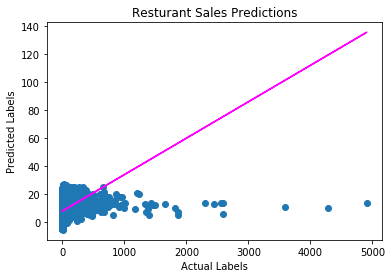

In [24]:
# Train the model
from sklearn.linear_model import LinearRegression

# Fit a linear regression model on the training set
model = LinearRegression().fit(X_train, y_train)
print (model)
#Visualise Traininign vs actual using scatter plot
%matplotlib inline

#Evaluation Matrics
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)

rmse = np.sqrt(mse)
print("RMSE:", rmse)

r2 = r2_score(y_test, predictions)
print("R2:", r2)
 #Plot Predicted vs Actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Resturant Sales Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()